# Data Cleaning/Preprocessing

In [74]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
#Verify if the dataset is encoded as UTF-8 format
import chardet

# Read the file as bytes
with open("C:/Users/fredd/Desktop/Mcgill/Winter 2025/Enterprise DS/Dataset/DataCoSupplyChainDataset.csv", "rb") as f:
    result = chardet.detect(f.read(10000))

#Show the encoding
print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


**Notes:** The file is encoded as 'ISO-8859-1'. Therefore we need to specify the encoding when loading the dataset. 

In [76]:
#Load Dataset
data = pd.read_csv("C:/Users/fredd/Desktop/Mcgill/Winter 2025/Enterprise DS/Dataset/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

In [77]:
#Verify the first five rows of the dataset
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [78]:
#Verify the data structure for correct data types and missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Notes:** As we can observe, there is a row ('Product Description') with '0' entries, we will proceed to confirm for other missing values and remove it.

In [79]:
#Check for missing values
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [80]:
#Remove 'Product Description' column (all values missing)
data = data.drop(columns=["Product Description"])

#Remove 'Order Zipcode' column (high missing values)
data = data.drop(columns=["Order Zipcode"])

#Verify if the rest of the missing values are significant
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [81]:
#Remove columns that are not necessary for the model

#Customer First Name
data = data.drop(columns=["Customer Fname"])

#Customer Last Name
data = data.drop(columns=["Customer Lname"])

#Customer Email
data = data.drop(columns=["Customer Email"])

#Customer Password
data = data.drop(columns=["Customer Password"])

#Product Image
data = data.drop(columns=["Product Image"])

#Visualize the first 5 rows of the dataset
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [82]:
#Remove ID columns

#Category ID
data = data.drop(columns=["Category Id"])

#Customer ID
data = data.drop(columns=["Customer Id"])

#Department ID
data = data.drop(columns=["Department Id"])

#Order ID
data = data.drop(columns=["Order Id"])

#Order Customer ID
data = data.drop(columns=["Order Customer Id"])

#Order Item ID
data = data.drop(columns=["Order Item Id"])

#Order Item Cardprod ID
data = data.drop(columns=["Order Item Cardprod Id"])

#Product Card ID
data = data.drop(columns=["Product Card Id"])

#Product Category ID
data = data.drop(columns=["Product Category Id"])   

In [83]:
#Remove Zipcodes, longitudes, and latitudes - not relevant to our model
data = data.drop(columns=["Customer Zipcode", "Latitude", "Longitude"])


In [84]:
#Remove street information - not relevant to our model
data = data.drop(columns=["Customer Street"])

**Notes:** Since we have columns with date information but their data type is 'object', we need to convert it fo datetime data type. 

In [85]:
#Convert features that represent date and time to datetime data type
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

#Handle the time and date variables (Separate them)
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [86]:
#Remove original 'object' type date features.
data = data.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"])

In [87]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,0,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,0,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,0,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,0,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,0,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15


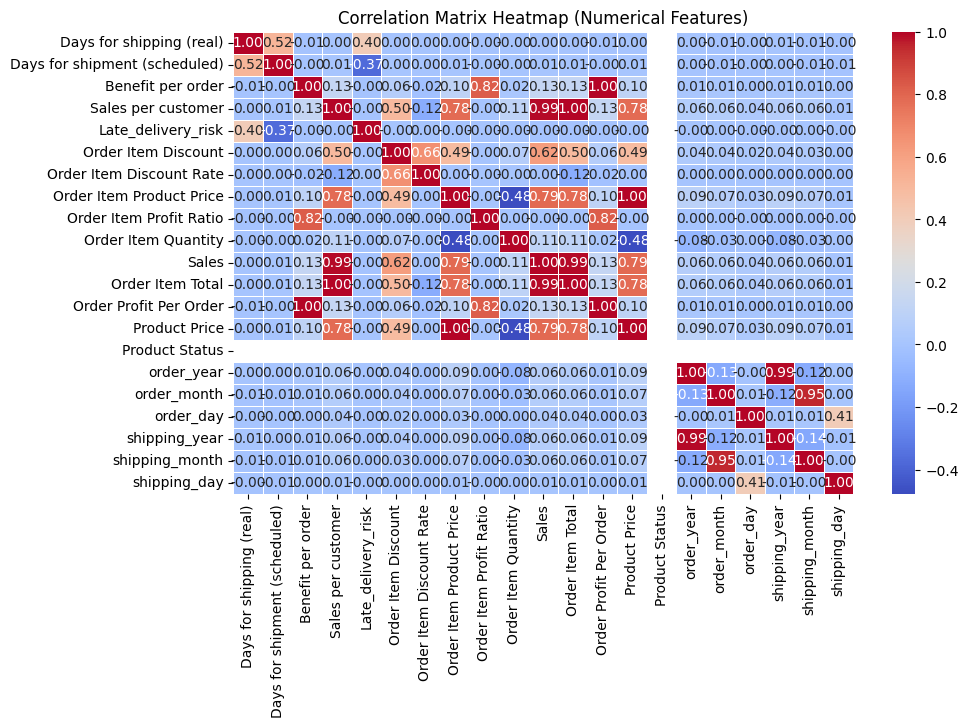

In [88]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

**Notes:** As we can observe in the correlation matrix, there is a problem that the 'Product Status' feature has no values. All inputs are '0'. Therefore, we proceed to remove it from the dataset. 

In [89]:
#Drop Product Status (all values are '0')
data = data.drop(columns=["Product Status"])

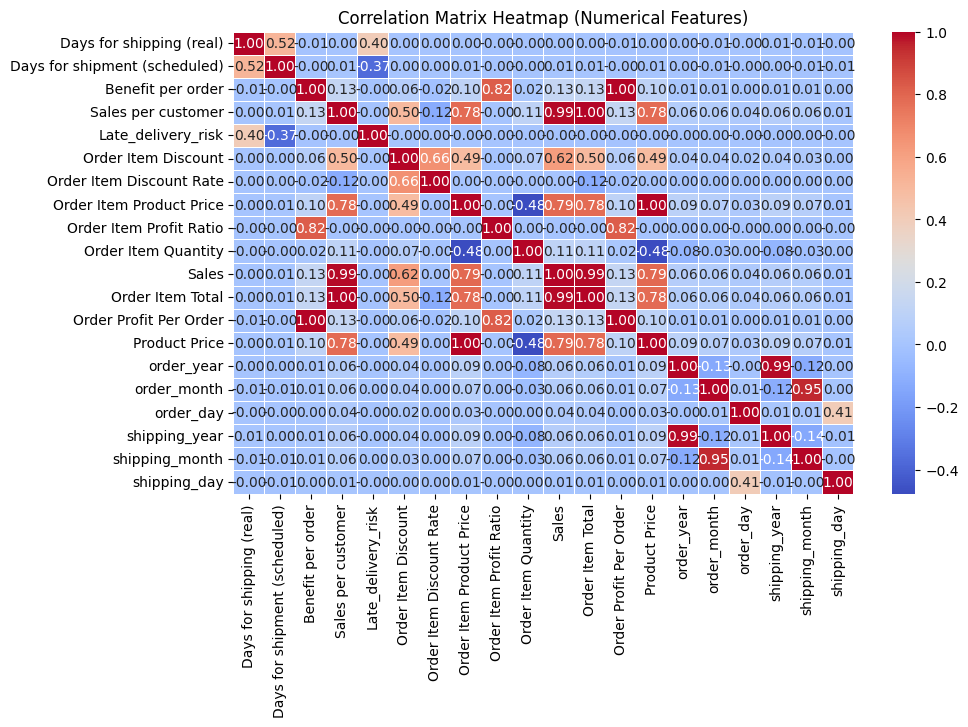

In [90]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [93]:
#Identify highly correlated features

#Correlation matrix using abs to consider both positive and negative correlations
correlation_matrix = num_data.corr().abs()

#Threshold
threshold = 0.8

#Extract feature pairs with high correlation
high_corr_features = set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
            high_corr_features.add(col1)
            high_corr_features.add(col2)

#Print the names of the highly correlated features
print("Highly correlated features:")
print(high_corr_features)


Highly correlated features:
{'Product Price', 'shipping_month', 'Order Profit Per Order', 'shipping_year', 'Order Item Product Price', 'order_year', 'Benefit per order', 'order_month', 'Order Item Profit Ratio', 'Sales', 'Sales per customer', 'Order Item Total'}


**Notes:** As we can observe from the correlation matrix and the list of the highly correlated features, there is high correlation between 'Product Price' and 'Order Item Product Price'. To avoid multicollinearity or redundancy in the data, we will remove the 'Order Item Product Price' column. 

Additionally, we are working with analyzing the causes of delay, where shipping information is prioritized when compared to the order information. In real life, we assume that the products are being ordered and shipped in the same year, unless it is ordered in the last week of the year, where it will shipped at the beginning of the following year. Therefore, to avoid multicollinearity, we will remove the 'order year' column. The same applies for month, we will remove the 'order month' column.

Moreover, the 'sales' and 'order item total' columns are correlated and both has the same values. Therefore, we will remove the 'sales' column. It also applies for 'sales per customer' and 'order item total'. Since we are not analyzing from the business side, we will remove the 'sales per customer' column. The same applies for 'order item profit ratio' and 'benefit per order', we will remove the 'benefit per order' column. 

In [ ]:
#Remove 'Order Item Product Price' column
data = data.drop(columns=["Order Item Product Price"])

In [96]:
#Remove 'order Year', 'order Month' column
data = data.drop(columns=["order_year", "order_month"])

In [98]:
#Remove 'Sales' column
data = data.drop(columns=["Sales"])

In [100]:
#Remove 'Sales per customer' column
data = data.drop(columns=["Sales per customer"])

In [102]:
#Remove 'Benefit per order' column
data = data.drop(columns=["Benefit per order"])

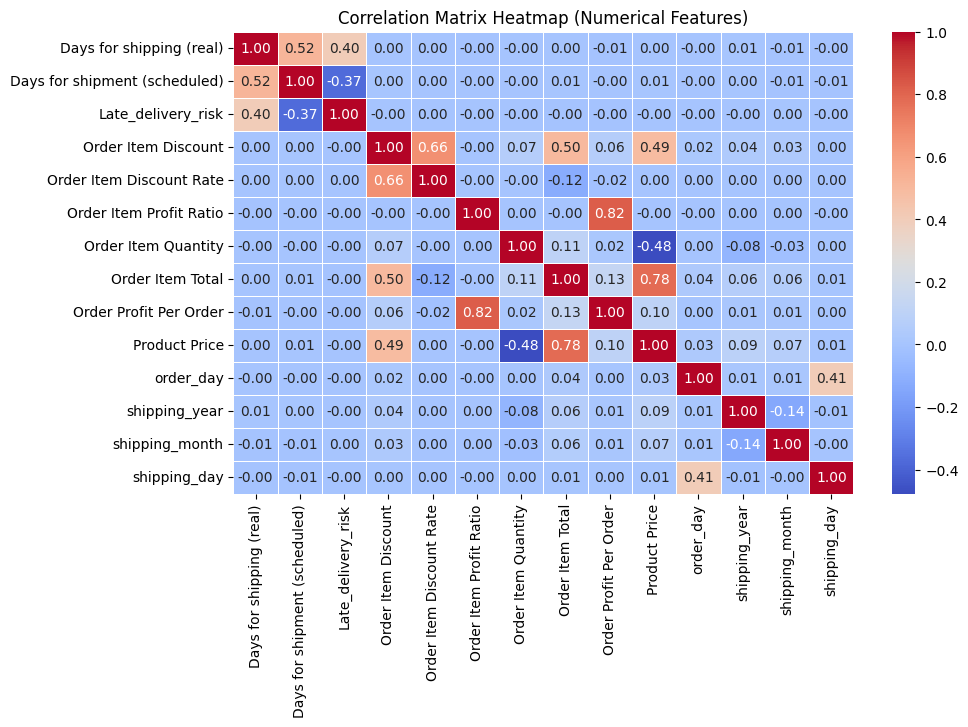

In [104]:
#Latest version of the Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [105]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,31,2018,2,3
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,16.389999,0.05,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,13,2018,1,18
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,18.030001,0.06,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,13,2018,1,17
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,13,2018,1,16
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,13,2018,1,15


**Notes:** The 'Days for shipping (real)' column shows the difference between shipping date and order date.

In [106]:
#Confirm that the target variable 'late_delivery_risk' has only 0 and 1 values
data['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

**Notes:** We need to detect if the numerical features in the dataset contains any outliers. Therefore, we are using boxplots to visualize the distribution and identify outliers.

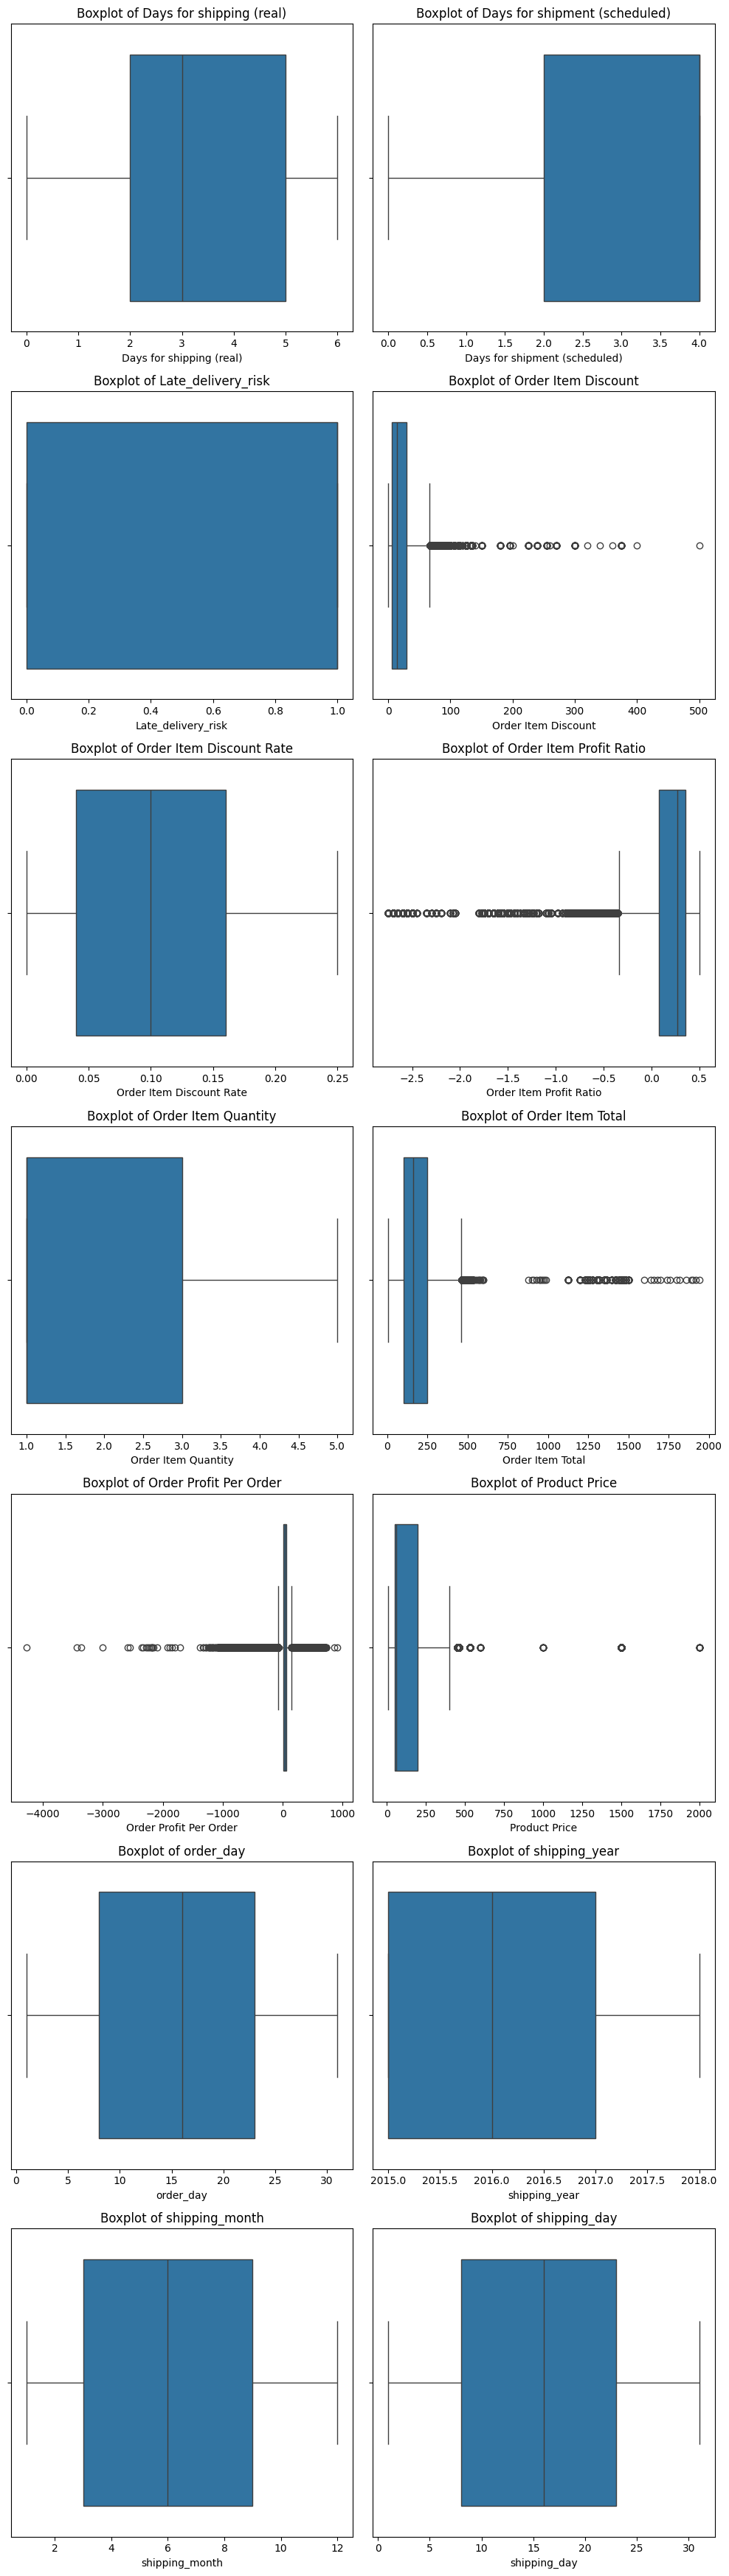

In [110]:
#Boxplot

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, column in enumerate(num_data.columns):
    sns.boxplot(data=num_data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Notes:** There are many visible outliers for our some of the numerical features, but mainly for 'Order Profit per Order'. We will proceed to remove them.

In [ ]:
#Create a copy of the dataframe to avoid modifying the original one
data_cleaned = data.copy()

#Loop through each numerical column to remove outliers
for column in num_data.columns:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    #Define the lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Remove rows that have values outside the lower and upper bounds
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

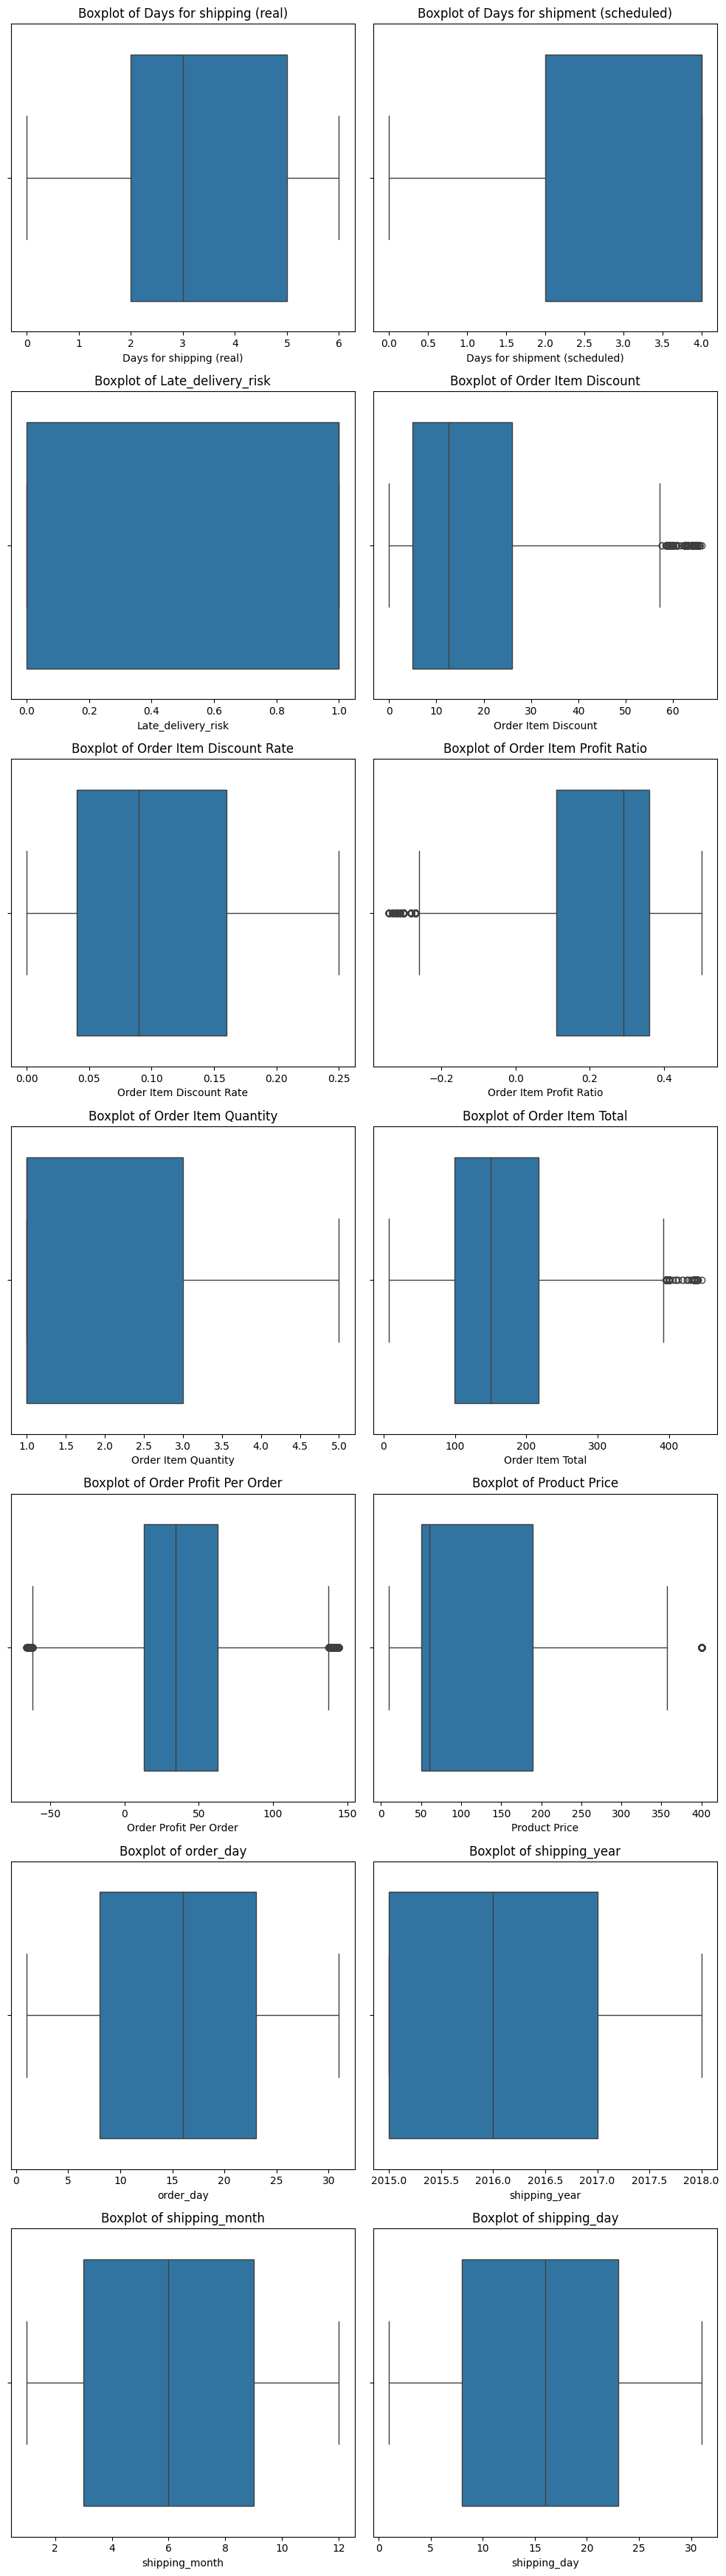

In [119]:
#Boxplots after removing the outliers

#Select only numerical columns
num_data_cleaned = data_cleaned.select_dtypes(include=["number"])

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data_cleaned.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

#Flatten the axes array for easy indexing
axes = axes.flatten()

#Loop through the numerical columns and plot them
for i, column in enumerate(num_data_cleaned.columns):
    sns.boxplot(data=num_data_cleaned, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Notes:** As we can observe from the visualizations, the majority of the outliers were removed. The boxplots looks reasonable and further outlier removal will be performed when the model performances are not meeting the expectations.

In [120]:
#Visualize first five rows of the cleaned dataset
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,31,2018,2,3
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,13,2018,1,16
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,13,2018,1,15
5,TRANSFER,6,4,Shipping canceled,0,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,Fitness,Pacific Asia,Toowoomba,Australia,32.779999,0.10,0.06,1,294.980011,18.580000,Oceania,Queensland,CANCELED,Smart watch,327.75,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,13,2018,1,19
6,DEBIT,2,1,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,Fitness,Pacific Asia,Guangzhou,China,39.330002,0.12,0.33,1,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,Smart watch,327.75,First Class,2018-01-13 10:42:00,2018-01-15 10:42:00,13,2018,1,15


**Notes:** Please use the 'data_cleaned' dataframe/dataset to proceed with the next steps.